# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from tqdm.notebook import tqdm


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create new dataframe to store the weather data
weather_df = pd.DataFrame()

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

# Loop through the cities list and pull the weather data from weather API
for i in tqdm(range(len(cities))):
    city_name = cities[i]
    weather_url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}'
    # Request weather data from API
    weather_api_data = requests.get(weather_url).json()
    if weather_api_data['cod'] == '404':
        print(f'Processing Record {(i+1)%50} of Set {int((i+1)/50)+1} | City not found. Skipping...')
        continue
    else:
        # Append weather data into weather_df
        weather_df = weather_df.append([[city_name, 
                                weather_api_data['coord']['lat'],
                                weather_api_data['coord']['lon'],
                                weather_api_data['main']['temp_max'],
                                weather_api_data['main']['humidity'],
                                weather_api_data['clouds']['all'],
                                weather_api_data['wind']['speed'],
                                weather_api_data['sys']['country'],
                                weather_api_data['dt']                           
                               ]])
        print(f'Processing Record {(i+1)%50} of Set {int((i+1)/50)+1} | {city_name}')



Beginning Data Retrieval
-----------------------------


Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | praya
Processing Record 5 of Set 1 | City not found. Skipping...
Processing Record 6 of Set 1 | solnechnyy
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | takoradi
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | City not found. Skipping...
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | cabedelo
Processing Record 13 of Set 1 | vangaindrano
Processing Record 14 of Set 1 | murray
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | domoni
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | chabahar
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | opuwo
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | salalah
Processing Record 23 of Set 1 | moranbah
Processing Reco

Processing Record 44 of Set 4 | polson
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | deputatskiy
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | nortelandia
Processing Record 0 of Set 5 | westport
Processing Record 1 of Set 5 | campbell river
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | yar-sale
Processing Record 4 of Set 5 | ankazoabo
Processing Record 5 of Set 5 | City not found. Skipping...
Processing Record 6 of Set 5 | doctor juan leon mallorquin
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | agua dulce
Processing Record 9 of Set 5 | guacimo
Processing Record 10 of Set 5 | clyde river
Processing Record 11 of Set 5 | diapaga
Processing Record 12 of Set 5 | boddam
Processing Record 13 of Set 5 | ilulissat
Processing Record 14 of Set 5 | sanandaj
Processing Record 15 of Set 5 | barrow
Processing Record 16 of Set 5 | hede
Processing Record 17 of Set 5

Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | leticia
Processing Record 39 of Set 8 | bilibino
Processing Record 40 of Set 8 | sarangani
Processing Record 41 of Set 8 | impfondo
Processing Record 42 of Set 8 | sarahan
Processing Record 43 of Set 8 | severo-yeniseyskiy
Processing Record 44 of Set 8 | bredasdorp
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | marzuq
Processing Record 47 of Set 8 | alice springs
Processing Record 48 of Set 8 | gallup
Processing Record 49 of Set 8 | morondava
Processing Record 0 of Set 9 | City not found. Skipping...
Processing Record 1 of Set 9 | City not found. Skipping...
Processing Record 2 of Set 9 | bezhetsk
Processing Record 3 of Set 9 | igarka
Processing Record 4 of Set 9 | arcachon
Processing Record 5 of Set 9 | acapulco
Processing Record 6 of Set 9 | tabory
Processing Record 7 of Set 9 | mitchell
Processing Record 8 of Set 9 | biak
Processing Record 9 of Set 9 | bull savanna
Processing Record 10

Processing Record 28 of Set 12 | manono
Processing Record 29 of Set 12 | san patricio
Processing Record 30 of Set 12 | krasnoselkup
Processing Record 31 of Set 12 | monrovia
Processing Record 32 of Set 12 | barra do garcas
Processing Record 33 of Set 12 | yagodnoye
Processing Record 34 of Set 12 | City not found. Skipping...
Processing Record 35 of Set 12 | alghero
Processing Record 36 of Set 12 | okato
Processing Record 37 of Set 12 | almeria
Processing Record 38 of Set 12 | bondo
Processing Record 39 of Set 12 | bosaso
Processing Record 40 of Set 12 | takestan
Processing Record 41 of Set 12 | isabela
Processing Record 42 of Set 12 | lompoc
Processing Record 43 of Set 12 | nueva guinea
Processing Record 44 of Set 12 | noumea
Processing Record 45 of Set 12 | touros
Processing Record 46 of Set 12 | pacific grove
Processing Record 47 of Set 12 | nagato
Processing Record 48 of Set 12 | doka
Processing Record 49 of Set 12 | mesyagutovo
Processing Record 0 of Set 13 | half moon bay
Processi

In [4]:
# Reset the columns name
weather_df.columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
# Reset the rows index
weather_df = weather_df.reset_index(drop=True)
# Store the data back to csv
weather_df.to_csv(output_data_file, index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Print the weather_df information
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        576 non-null    object 
 1   Lat         576 non-null    float64
 2   Lng         576 non-null    float64
 3   Max Temp    576 non-null    float64
 4   Humidity    576 non-null    int64  
 5   Cloudiness  576 non-null    int64  
 6   Wind Speed  576 non-null    float64
 7   Country     576 non-null    object 
 8   Date        576 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.6+ KB


In [6]:
# Print weather_df
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.87,-73.82,284.82,93,75,7.70,CL,1589057451
1,pangnirtung,66.15,-65.71,272.97,92,100,2.65,CA,1589057692
2,provideniya,64.38,-173.30,277.12,76,100,11.46,RU,1589057692
3,praya,14.92,-23.51,296.15,73,75,8.20,CV,1589057417
4,solnechnyy,50.72,136.63,281.84,59,100,1.11,RU,1589057693


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check if weather_df has any humidity > 100%
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.909097,18.837222,290.280191,69.321181,48.960069,3.817552,1.589058e+09
std,32.987583,89.314952,10.195440,22.648220,38.683781,2.836520,1.094752e+02
min,-54.800000,-179.170000,262.640000,3.000000,0.000000,0.060000,1.589057e+09
25%,-7.307500,-59.822500,282.940000,55.000000,6.000000,1.767500,1.589058e+09
50%,22.185000,26.035000,291.935000,76.000000,45.000000,3.100000,1.589058e+09
75%,47.675000,93.142500,298.997500,87.000000,90.000000,5.100000,1.589058e+09
max,78.220000,179.320000,310.370000,100.000000,100.000000,28.000000,1.589058e+09


In [8]:
# Create test dataframe for the humidity test since there is no humidity > 100% in the original data
weather_test_df = weather_df.copy()
# Append the test point into the weather_test_df
weather_test_df = weather_test_df.append({'City':'test_for_hum', 
                        'Lat' : 1.0, 
                        'Lng' : 1.0, 
                        'Max Temp' : 273, 
                        'Humidity' : 101, 
                        'Cloudiness' : 0, 
                        'Wind Speed' : 1.5, 
                        'Country' : 'US', 
                        'Date' : 1588986960}, ignore_index=True)
weather_test_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.87,-73.82,284.82,93,75,7.70,CL,1589057451
1,pangnirtung,66.15,-65.71,272.97,92,100,2.65,CA,1589057692
2,provideniya,64.38,-173.30,277.12,76,100,11.46,RU,1589057692
3,praya,14.92,-23.51,296.15,73,75,8.20,CV,1589057417
4,solnechnyy,50.72,136.63,281.84,59,100,1.11,RU,1589057693
...,...,...,...,...,...,...,...,...,...
572,muros,42.78,-9.06,287.59,88,51,2.68,ES,1589057950
573,krasnozerskoye,53.98,79.24,286.32,71,0,3.70,RU,1589057950
574,jardim,-21.48,-56.14,294.80,52,0,1.54,BR,1589057950
575,narrabri,-30.32,149.78,282.59,81,0,3.10,AU,1589057951


In [9]:
#  Get the indices of cities that have humidity over 100%.
# Find the one that is less and equal to 100%
hum_over_bool = (weather_test_df['Humidity'] <= 100)

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_test_df.loc[hum_over_bool, :]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.87,-73.82,284.82,93,75,7.70,CL,1589057451
1,pangnirtung,66.15,-65.71,272.97,92,100,2.65,CA,1589057692
2,provideniya,64.38,-173.30,277.12,76,100,11.46,RU,1589057692
3,praya,14.92,-23.51,296.15,73,75,8.20,CV,1589057417
4,solnechnyy,50.72,136.63,281.84,59,100,1.11,RU,1589057693
...,...,...,...,...,...,...,...,...,...
571,naliya,23.27,68.83,299.54,89,0,4.26,IN,1589057949
572,muros,42.78,-9.06,287.59,88,51,2.68,ES,1589057950
573,krasnozerskoye,53.98,79.24,286.32,71,0,3.70,RU,1589057950
574,jardim,-21.48,-56.14,294.80,52,0,1.54,BR,1589057950


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

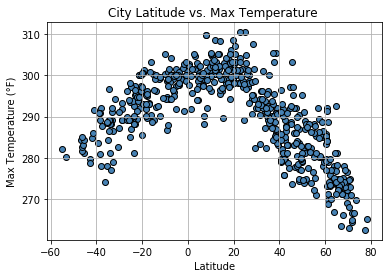

In [12]:
# Plot the scatter plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Max Temperature ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()
plt.show()

As the plot show above that at latitude around the center of the latitude has the hotter temperature. Edge of the latitude has colder temperature.

## Latitude vs. Humidity Plot

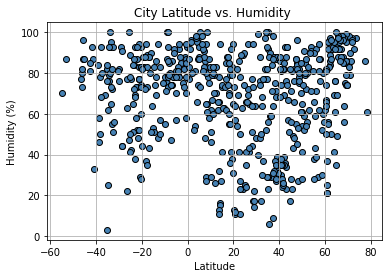

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

Humidity plot itself could not tell too much story by latitude itself since it looks like it is affect more by the ocean, so the higher humidity % is probably clost to the ocean itself.

## Latitude vs. Cloudiness Plot

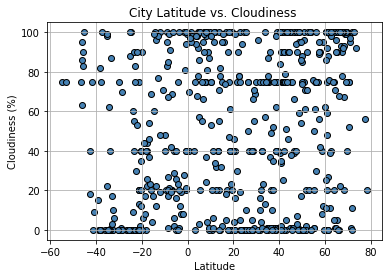

In [14]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Cloudiness ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

Cloudiness plot looks like cloudiness is the location depended, same latitude can be either 100% cloudiness or 0% cloudines.

## Latitude vs. Wind Speed Plot

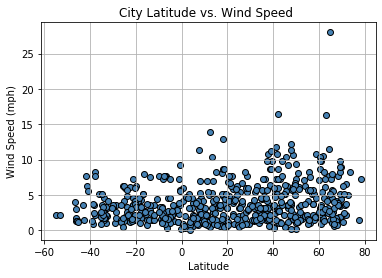

In [15]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

Wind speed plot show that most of the places dont have a lot of wind. Usually the areas have the higher wind speed is close to the higher latitude.

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def liner_reg(input_df, x, y) -> tuple:
    x_values = input_df[x].astype('float')
    y_values = input_df[y].astype('float')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (line_eq, x_values, regress_values, rvalue)

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_index = (weather_df['Lat'] >= 0)
northern_weather_df = weather_df.loc[northern_index,:]

In [18]:
southern_index = (weather_df['Lat'] < 0)
southern_weather_df = weather_df.loc[southern_index,:]

In [19]:
def plot_lin_reg(hemi, ax, ay, py):
    """ Plot """
    if hemi.upper() == 'N':
        temp_df = northern_weather_df
    elif hemi.upper() == 'S':
        temp_df = southern_weather_df
    else:
        print(f'Issue with hemisphere')
        
    if py == 'Max Temp':
        py_label = 'Max Temperature (°F)'
    elif py == 'Humidity':
        py_label = 'Humidity (%)'
    elif py == 'Cloudiness':
        py_label = 'Cloudiness (%)'
    elif py == 'Wind Speed':
        py_label = 'Wind Speed (mph)'
    else:
        print(f'Issue with py')
        
    plt.scatter(temp_df['Lat'], temp_df[py], c='steelblue', edgecolors='black')
    plt.xlabel('Latitude')
    plt.ylabel(py_label)

    # Plot regression line
    (line_eq, x_values, regress_values, rvalue) = liner_reg(temp_df, 'Lat', py)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(ax,ay),fontsize=15,color="red")
    print(f"R squared: {rvalue**2}")
    plt.show()
    return 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7475743650033473


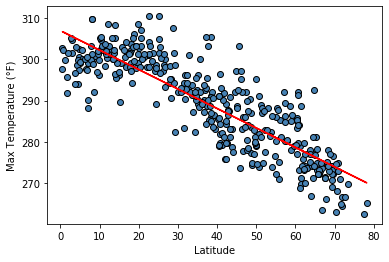

In [20]:
plot_lin_reg('N', 10, 260, 'Max Temp')

The linear regression shows that the higher latitude the colder the area will be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5976057487890921


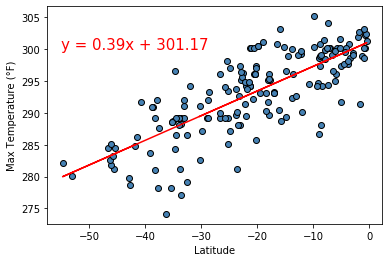

In [21]:
plot_lin_reg('S', -55, 300, 'Max Temp')

The linear regression shows that closer to the center of the latitude it becomes warmer and warmer.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.01797411985643502


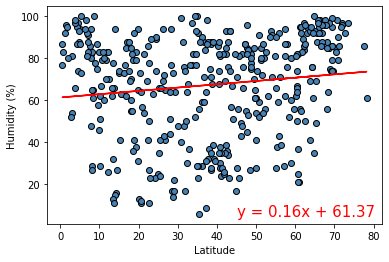

In [22]:
plot_lin_reg('N', 45, 5, 'Humidity')

Humidity is pretty flat across the northern hemisphere, most of the areas have high humidity level.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.010181747289829181


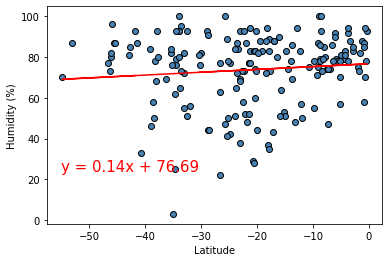

In [23]:
plot_lin_reg('S', -55, 24, 'Humidity')

Humidity is pretty flat across the southern hemisphere as well, and closer to the 0 latitude, the humitidty is higher.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.005294785591858632


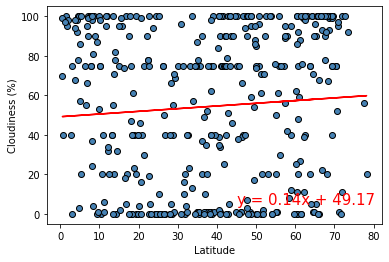

In [24]:
plot_lin_reg('N', 45, 5, 'Cloudiness')

Most of the areas in the northern hemispher, cloudiness level is either 100% or 0%.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0027461614344849354


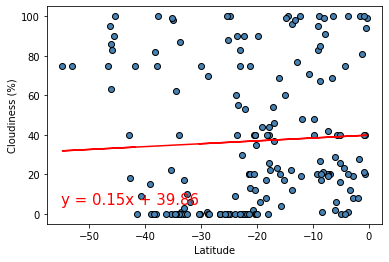

In [25]:
plot_lin_reg('S', -55, 5, 'Cloudiness')

For southern hemisphere,  most of the areas around -30 to -20 latitude have 0% cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.03125292107585675


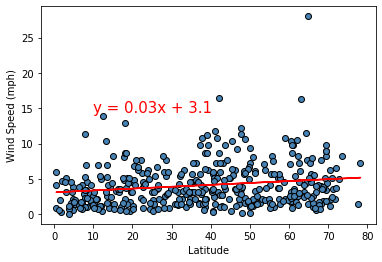

In [26]:
plot_lin_reg('N', 10, 14.5, 'Wind Speed')

Northern hemisphere has pretty average wind speed between 2~4 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0038568289651671715


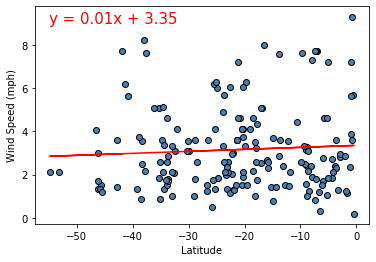

In [27]:
plot_lin_reg('S', -55, 9, 'Wind Speed')

For southern hemisphere, the closer to the 0 latitude, the less wind speed it has.